# Airline Customer Satisfaction

## Problem Statement
### >This project aims at predicting customer satisfaction levels within an undisclosed airline company.

## Lifecycle of a ML project
### 1.Data collection
### 2.Data prepration
### 3.Data cleansing
### 4.Data exploration
### 5.Data transformation and Feature engineering
### 6.Model training
### 7.Model hyperparameter tuning
### 8.Model evaluation
### 9.Model deloyment and maintainance

### Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\odhia\AppData\Local\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Data collection

In [2]:
df = pd.read_csv('Airline_customer_satisfaction.csv')
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


### Overall information of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

#### Insight: Only the last column has null values

### Statistical summary of the data

In [4]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [5]:
df.duplicated().sum()

0

In [6]:
df.columns = df.columns.str.lower()

In [7]:
df.columns

Index(['satisfaction', 'customer type', 'age', 'type of travel', 'class',
       'flight distance', 'seat comfort', 'departure/arrival time convenient',
       'food and drink', 'gate location', 'inflight wifi service',
       'inflight entertainment', 'online support', 'ease of online booking',
       'on-board service', 'leg room service', 'baggage handling',
       'checkin service', 'cleanliness', 'online boarding',
       'departure delay in minutes', 'arrival delay in minutes'],
      dtype='object')

In [8]:
df['arrival delay in minutes'].fillna(df['arrival delay in minutes'].median(),inplace=True)

C:\Users\odhia\AppData\Local\Temp\ipykernel_6844\1587564352.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['arrival delay in minutes'].fillna(df['arrival delay in minutes'].median(),inplace=True)


### Let's start exploring the columns
#### Satisfaction:>indicatesatisfaction level for customer

In [9]:
df['satisfaction'].value_counts()

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

<Axes: xlabel='satisfaction', ylabel='count'>

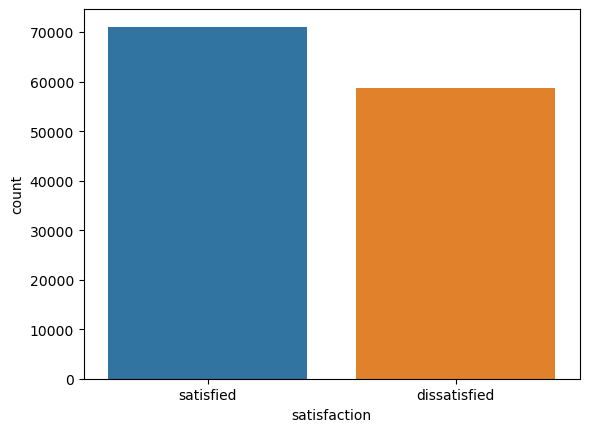

In [10]:
sns.countplot(x=df['satisfaction'])

#### Insight: There is no imbalance, and that's a win

#### Customer type:>Type of customer: 'Loyal Customer' or 'Disloyal Customer’.

In [11]:
df['customer type'].value_counts()

customer type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64

In [12]:
def clean_customer_type(x):
    if x == 'disloyal Customer':
        return 'Disloyal Customer'
    else:
        return x
df['customer type'] = df['customer type'].apply(clean_customer_type)

<Axes: xlabel='customer type', ylabel='count'>

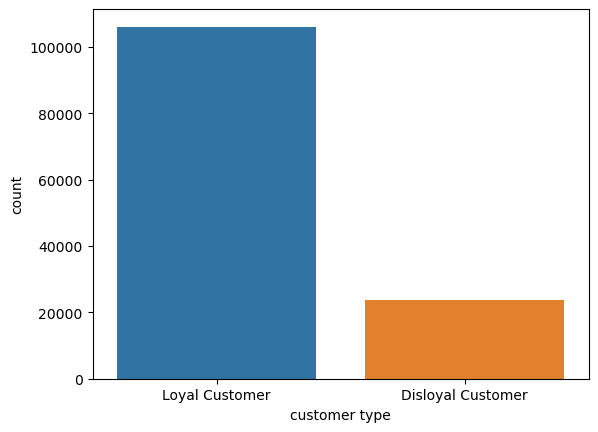

In [13]:
sns.countplot(x=df['customer type'])

In [14]:
print(f"The maximum age of customer is: {df['age'].max()}")
print('='*10)
print(f"The minimum age of customer is: {df['age'].min()}")

The maximum age of customer is: 85
The minimum age of customer is: 7


C:\Users\odhia\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


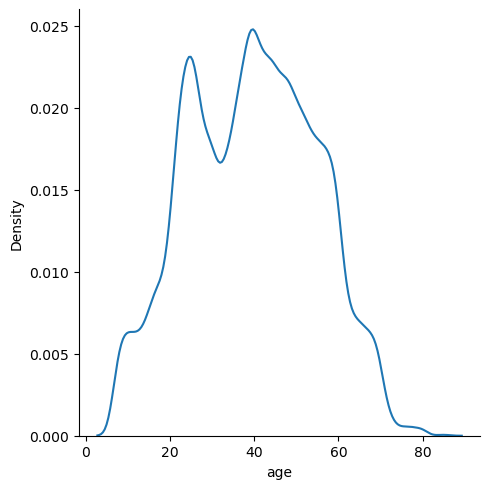

In [15]:
sns.displot(x=df['age'],kind='kde')

##### Most customers are of age 40

### Type of travel:>Purpose of the travel: 'Business travel' or 'Personal Travel’.

In [16]:
df['type of travel'].value_counts()

type of travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64

<Axes: xlabel='type of travel', ylabel='count'>

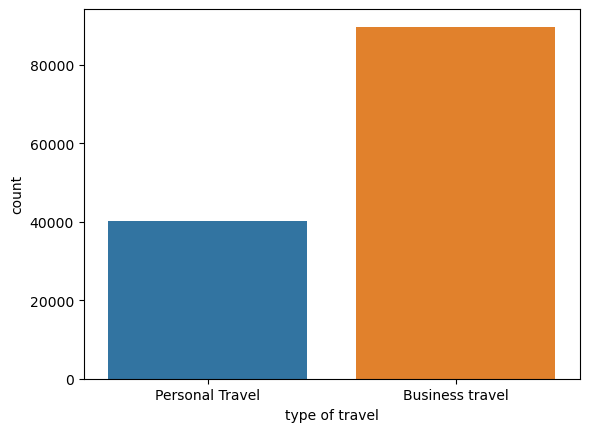

In [17]:
sns.countplot(x=df['type of travel'])

### Class:>Class of travel: 'Business', 'Eco', or 'Eco Plus’.

In [18]:
df['class'].value_counts()

class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64

In [19]:
def clean_class(x):
    if x == 'Eco':
        return 'Economy'
    if x == 'Eco Plus':
        return 'Economy Plus'
    else:
        return x
df['class'] = df['class'].apply(clean_class)

<Axes: xlabel='class', ylabel='count'>

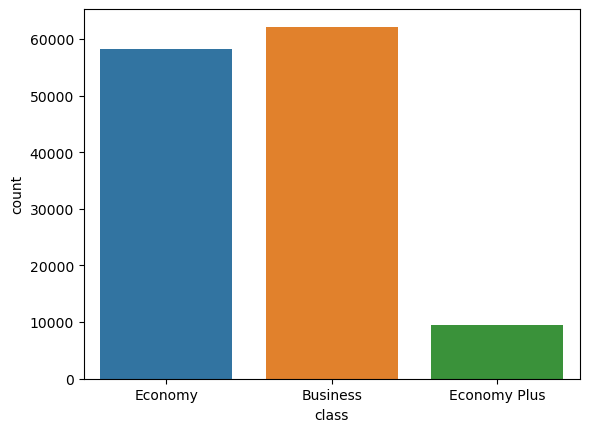

In [20]:
sns.countplot(x=df['class'])

### Flight Distance:>The distance of the flight in kilometres

In [21]:
print(f"The maximum distance of flight is: {df['flight distance'].max()} km")
print('='*30)
print(f"The minimum distance of flight is: {df['flight distance'].min()} km")

The maximum distance of flight is: 6951 km
The minimum distance of flight is: 50 km


In [22]:
df.groupby('class')['flight distance'].max()
# this outputs the maximum distance covered by the htree classes of travel

class
Business        6951
Economy         6924
Economy Plus    6889
Name: flight distance, dtype: int64

In [23]:
df.groupby('class')['flight distance'].min()
# this outputs the maximum distance covered by the htree classes of travel

class
Business        50
Economy         50
Economy Plus    50
Name: flight distance, dtype: int64

### Seat comfort:>Rating of seat comfort provided during the flight (1 to 5).0(Not rated)

In [24]:
df['seat comfort'].unique()

array([0, 1, 4, 5, 2, 3], dtype=int64)

C:\Users\odhia\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


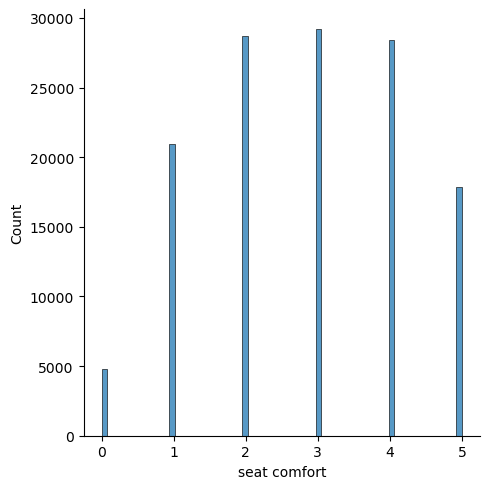

In [25]:
sns.displot(x=df['seat comfort'])
# most customers gave a rating of 3, while few customer did not give the rating

### Departure/Arrival time convenient:>Rating of the convenience of departure/arrival time (1 to 5). 0(Not rated)

In [26]:
df['departure/arrival time convenient'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

C:\Users\odhia\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


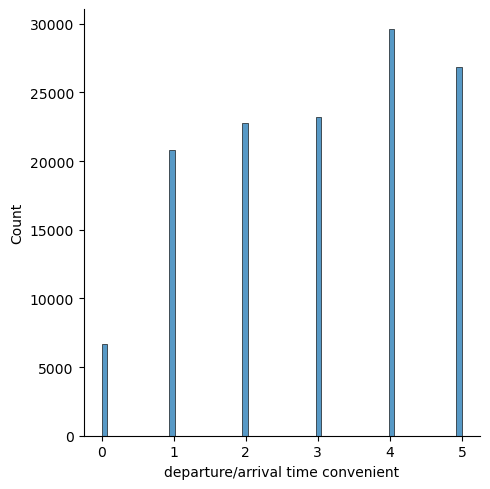

In [27]:
sns.displot(x=df['departure/arrival time convenient'])
# most customers gave a rating of 4, while few customer did not give the rating

In [28]:
df.columns

Index(['satisfaction', 'customer type', 'age', 'type of travel', 'class',
       'flight distance', 'seat comfort', 'departure/arrival time convenient',
       'food and drink', 'gate location', 'inflight wifi service',
       'inflight entertainment', 'online support', 'ease of online booking',
       'on-board service', 'leg room service', 'baggage handling',
       'checkin service', 'cleanliness', 'online boarding',
       'departure delay in minutes', 'arrival delay in minutes'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   customer type                      129880 non-null  object 
 2   age                                129880 non-null  int64  
 3   type of travel                     129880 non-null  object 
 4   class                              129880 non-null  object 
 5   flight distance                    129880 non-null  int64  
 6   seat comfort                       129880 non-null  int64  
 7   departure/arrival time convenient  129880 non-null  int64  
 8   food and drink                     129880 non-null  int64  
 9   gate location                      129880 non-null  int64  
 10  inflight wifi service              129880 non-null  int64  
 11  inflight entertainment             1298

### Food and drink:>Rating of food and drink quality provided during the flight (1 to 5) 0(Not rated)

C:\Users\odhia\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


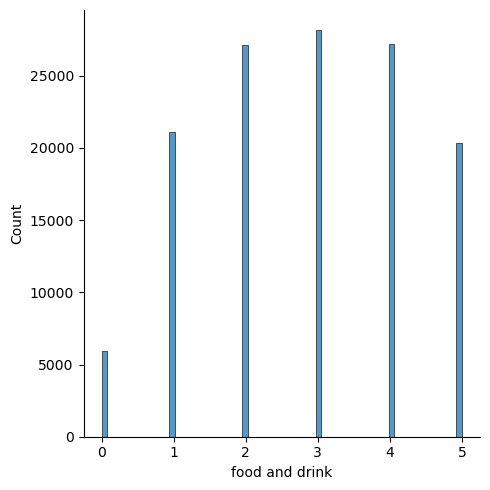

In [30]:
sns.displot(x=df['food and drink'])
# most customers gave a rating of 3, while few customer did not give the rating

### Gate location:>Rating of gate location convenience (1 to 5).

C:\Users\odhia\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


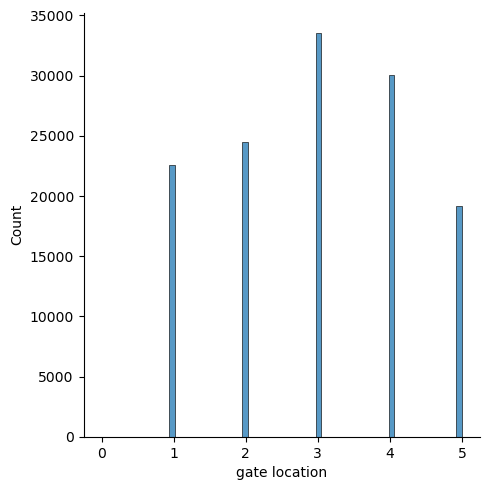

In [31]:
sns.displot(x=df['gate location'])
# most customers gave a rating of 3, while few customer did not give the rating

### Inflight wifi service:>Rating of inflight wifi service satisfaction (1 to 5).

C:\Users\odhia\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


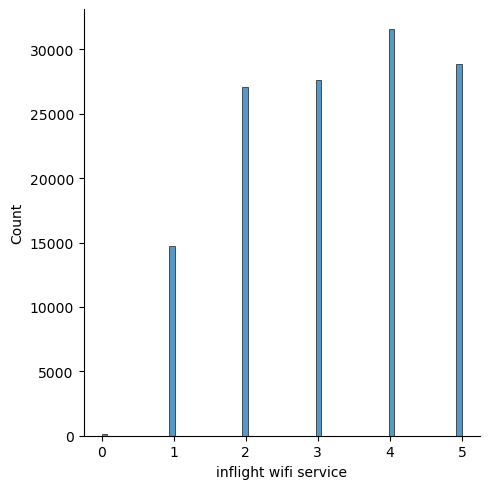

In [32]:
sns.displot(x=df['inflight wifi service'])
# most customers gave a rating of 4, while few customer did not give the rating

### Inflight entertainment:Rating of inflight entertainment satisfaction (1 to 5).

C:\Users\odhia\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


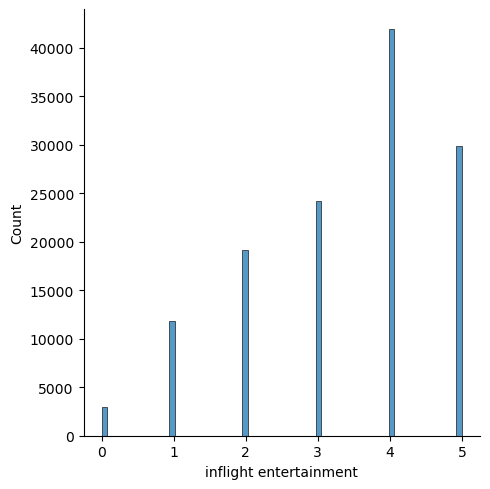

In [33]:
sns.displot(x=df['inflight entertainment'])
# most customers gave a rating of 4, while few customer did not give the rating

### Ease of Online booking:>Rating of ease of online booking satisfaction (1 to 5).

C:\Users\odhia\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


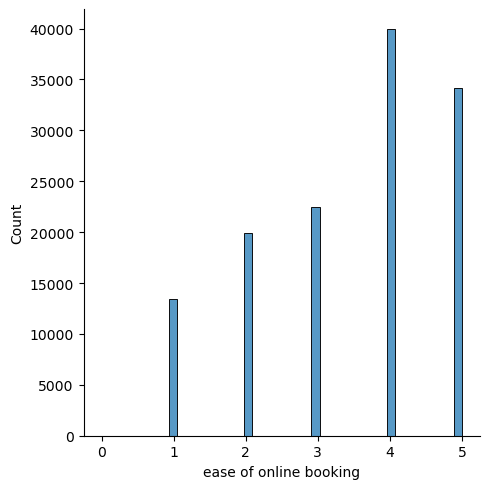

In [34]:
sns.displot(x=df['ease of online booking'])
# most customers gave a rating of 4, while few customer did not give the rating

### On-board service:>Rating of on-board service satisfaction (1 to 5).

C:\Users\odhia\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


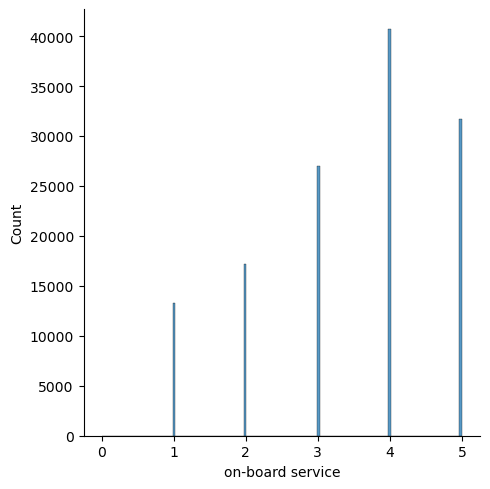

In [35]:
sns.displot(x=df['on-board service'])
# most customers gave a rating of 4, while few customer did not give the rating

### Leg room service:>Rating of leg room service satisfaction (1 to 5).

C:\Users\odhia\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


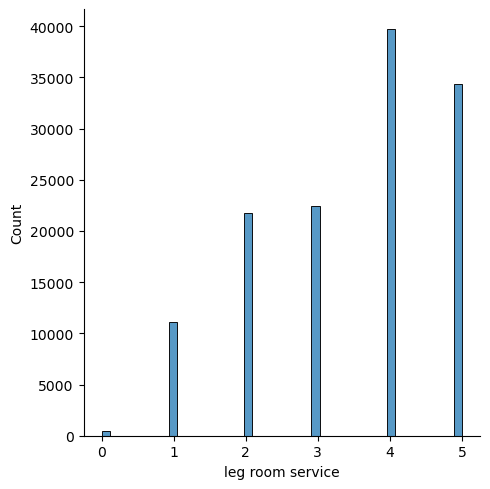

In [36]:
sns.displot(x=df['leg room service'])
# most customers gave a rating of 4, while few customer did not give the rating

### Baggage handling>Rating of baggage handling satisfaction (1 to 5).

C:\Users\odhia\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


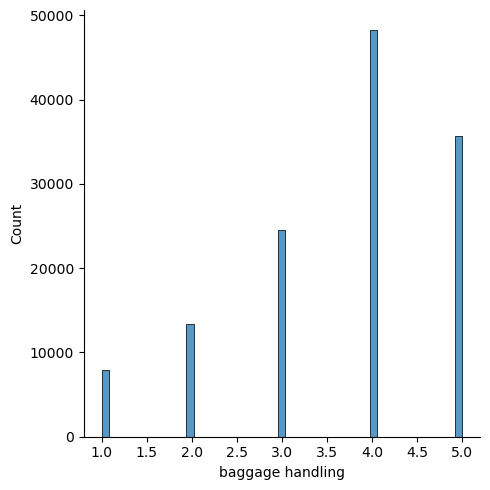

In [37]:
sns.displot(x=df['baggage handling'])
# most customers gave a rating of4,, while few customer did not give the rating

### Checkin service	Rating of check-in service satisfaction (1 to 5).

C:\Users\odhia\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


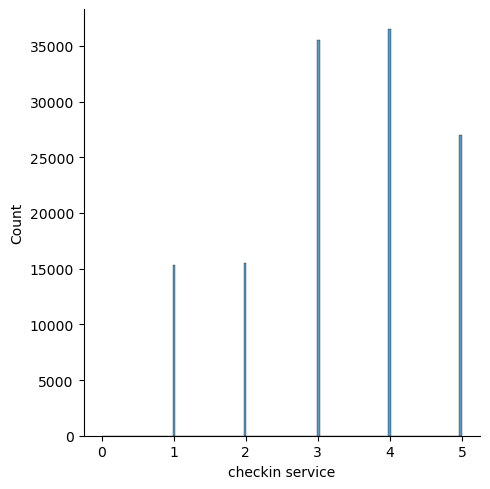

In [38]:
sns.displot(x=df['checkin service'])
# most customers gave a rating of 4, while few customer did not give the rating

### Cleanliness	Rating of cleanliness satisfaction (1 to 5).

C:\Users\odhia\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


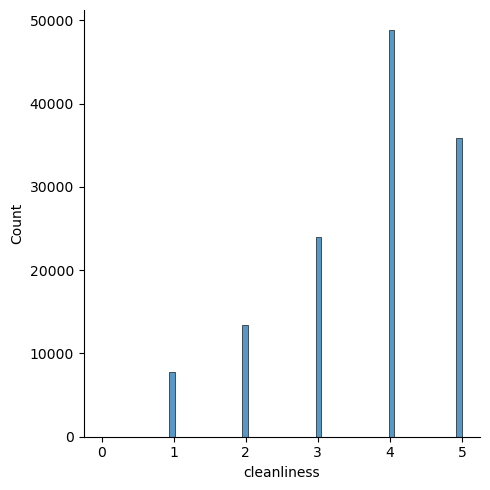

In [39]:
sns.displot(x=df['cleanliness'])
# most customers gave a rating of 4, while few customer did not give the rating

### Online boarding	Rating of online boarding satisfaction (1 to 5).

C:\Users\odhia\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


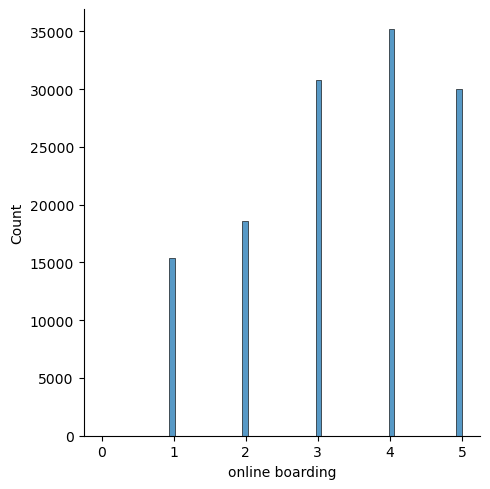

In [40]:
sns.displot(x=df[ 'online boarding'])
# most customers gave a rating of 4, while few customer did not give the rating

### Departure Delay in Minutes	Total departure delay in minutes.

In [41]:
print(f"The maximum time a plane can delay to depature is {df['departure delay in minutes'].max()} minutes")
print(f"The minimum time a plane can delay to depature is {df['departure delay in minutes'].min()} minutes")
print('*'*50)
print(f"The maximum time a plane can delay to arrive is {df['arrival delay in minutes'].max()} minutes")
print(f"The minimum time a plane can delay to arrive is {df['arrival delay in minutes'].min()} minutes")

The maximum time a plane can delay to depature is 1592 minutes
The minimum time a plane can delay to depature is 0 minutes
**************************************************
The maximum time a plane can delay to arrive is 1584.0 minutes
The minimum time a plane can delay to arrive is 0.0 minutes


### We canget rid of customers who did not give any rating

In [42]:
rate_cols = ['seat comfort', 'departure/arrival time convenient',
       'food and drink', 'gate location', 'inflight wifi service',
       'inflight entertainment', 'online support', 'ease of online booking',
       'on-board service', 'leg room service', 'baggage handling',
       'checkin service', 'cleanliness', 'online boarding']

In [43]:
for column in rate_cols:
    df = df[df[column]!=0]

In [44]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [45]:
df.shape

(119611, 22)

In [53]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [54]:
encoder_cust = LabelEncoder()
encoder_type = LabelEncoder()
encoder_class = LabelEncoder()
df['customer type'] = encoder_cust.fit_transform(df['customer type'])
df['type of travel'] = encoder_type.fit_transform(df['type of travel'])
df['class'] = encoder_class.fit_transform(df['class'])

In [55]:
X = df.drop('satisfaction',axis=1)
y = df['satisfaction'].map({'dissatisfied':0,'satisfied':1})

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [57]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
models = {
    'Logistic Regression':LogisticRegression(),
    'SVC':SVC(),
    'KNeighbours':KNeighborsClassifier(),
    'Cat Boost':CatBoostClassifier(),
    'LGBM':LGBMClassifier(),
    'XGB':XGBClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),  
}

In [59]:
report = {}
print('Model list and their corresponding accuracies')
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    score = accuracy_score(y_test,prediction)
    report[list(models.keys())[i]] = score
best_score = max(sorted(list(report.values())))
for k,v in report.items():
    if v == best_score:
        best_model_name = k
        break
print(report)
print(f"{best_model_name} is the best model with accuracy of {best_score}")

Model list and their corresponding accuracies
Learning rate set to 0.070274
0:	learn: 0.6057039	total: 1.24s	remaining: 20m 36s
1:	learn: 0.5354770	total: 1.31s	remaining: 10m 55s
2:	learn: 0.4865067	total: 1.35s	remaining: 7m 29s
3:	learn: 0.4453730	total: 1.39s	remaining: 5m 46s
4:	learn: 0.4142381	total: 1.43s	remaining: 4m 44s
5:	learn: 0.3851976	total: 1.47s	remaining: 4m 4s
6:	learn: 0.3624551	total: 1.51s	remaining: 3m 34s
7:	learn: 0.3401792	total: 1.55s	remaining: 3m 12s
8:	learn: 0.3239612	total: 1.58s	remaining: 2m 54s
9:	learn: 0.3099629	total: 1.62s	remaining: 2m 40s
10:	learn: 0.2969689	total: 1.66s	remaining: 2m 29s
11:	learn: 0.2806664	total: 1.69s	remaining: 2m 19s
12:	learn: 0.2727450	total: 1.74s	remaining: 2m 12s
13:	learn: 0.2651259	total: 1.77s	remaining: 2m 5s
14:	learn: 0.2590141	total: 1.81s	remaining: 1m 58s
15:	learn: 0.2488530	total: 1.85s	remaining: 1m 53s
16:	learn: 0.2429636	total: 1.88s	remaining: 1m 48s
17:	learn: 0.2391622	total: 1.92s	remaining: 1m 44

162:	learn: 0.1175096	total: 7.58s	remaining: 38.9s
163:	learn: 0.1168109	total: 7.67s	remaining: 39.1s
164:	learn: 0.1166659	total: 7.71s	remaining: 39s
165:	learn: 0.1164120	total: 7.74s	remaining: 38.9s
166:	learn: 0.1161625	total: 7.79s	remaining: 38.9s
167:	learn: 0.1159796	total: 7.85s	remaining: 38.9s
168:	learn: 0.1158626	total: 7.9s	remaining: 38.8s
169:	learn: 0.1156981	total: 7.95s	remaining: 38.8s
170:	learn: 0.1155225	total: 8s	remaining: 38.8s
171:	learn: 0.1153876	total: 8.04s	remaining: 38.7s
172:	learn: 0.1152708	total: 8.08s	remaining: 38.6s
173:	learn: 0.1151244	total: 8.11s	remaining: 38.5s
174:	learn: 0.1150051	total: 8.15s	remaining: 38.4s
175:	learn: 0.1149344	total: 8.18s	remaining: 38.3s
176:	learn: 0.1148187	total: 8.24s	remaining: 38.3s
177:	learn: 0.1146296	total: 8.28s	remaining: 38.2s
178:	learn: 0.1144067	total: 8.31s	remaining: 38.1s
179:	learn: 0.1141722	total: 8.35s	remaining: 38s
180:	learn: 0.1140202	total: 8.4s	remaining: 38s
181:	learn: 0.1138998	t

325:	learn: 0.0993144	total: 14.1s	remaining: 29.1s
326:	learn: 0.0992284	total: 14.1s	remaining: 29.1s
327:	learn: 0.0991648	total: 14.2s	remaining: 29s
328:	learn: 0.0990708	total: 14.2s	remaining: 29s
329:	learn: 0.0990357	total: 14.2s	remaining: 28.9s
330:	learn: 0.0989385	total: 14.3s	remaining: 28.9s
331:	learn: 0.0988273	total: 14.3s	remaining: 28.8s
332:	learn: 0.0987713	total: 14.4s	remaining: 28.7s
333:	learn: 0.0987068	total: 14.4s	remaining: 28.7s
334:	learn: 0.0986780	total: 14.4s	remaining: 28.6s
335:	learn: 0.0986271	total: 14.5s	remaining: 28.6s
336:	learn: 0.0985899	total: 14.5s	remaining: 28.5s
337:	learn: 0.0985329	total: 14.5s	remaining: 28.4s
338:	learn: 0.0984642	total: 14.6s	remaining: 28.4s
339:	learn: 0.0983458	total: 14.6s	remaining: 28.3s
340:	learn: 0.0983117	total: 14.6s	remaining: 28.3s
341:	learn: 0.0982760	total: 14.7s	remaining: 28.2s
342:	learn: 0.0982016	total: 14.7s	remaining: 28.2s
343:	learn: 0.0981730	total: 14.7s	remaining: 28.1s
344:	learn: 0.09

484:	learn: 0.0903652	total: 19.7s	remaining: 20.9s
485:	learn: 0.0903332	total: 19.7s	remaining: 20.8s
486:	learn: 0.0902460	total: 19.7s	remaining: 20.8s
487:	learn: 0.0902000	total: 19.8s	remaining: 20.8s
488:	learn: 0.0901805	total: 19.8s	remaining: 20.7s
489:	learn: 0.0901494	total: 19.9s	remaining: 20.7s
490:	learn: 0.0900965	total: 19.9s	remaining: 20.6s
491:	learn: 0.0900267	total: 19.9s	remaining: 20.6s
492:	learn: 0.0899878	total: 20s	remaining: 20.5s
493:	learn: 0.0899604	total: 20s	remaining: 20.5s
494:	learn: 0.0899556	total: 20s	remaining: 20.4s
495:	learn: 0.0898732	total: 20.1s	remaining: 20.4s
496:	learn: 0.0898306	total: 20.1s	remaining: 20.4s
497:	learn: 0.0898004	total: 20.2s	remaining: 20.3s
498:	learn: 0.0897637	total: 20.2s	remaining: 20.3s
499:	learn: 0.0897227	total: 20.3s	remaining: 20.3s
500:	learn: 0.0896732	total: 20.3s	remaining: 20.2s
501:	learn: 0.0896385	total: 20.4s	remaining: 20.2s
502:	learn: 0.0895870	total: 20.4s	remaining: 20.2s
503:	learn: 0.0895

648:	learn: 0.0837883	total: 26.1s	remaining: 14.1s
649:	learn: 0.0837604	total: 26.1s	remaining: 14.1s
650:	learn: 0.0837297	total: 26.2s	remaining: 14s
651:	learn: 0.0836862	total: 26.2s	remaining: 14s
652:	learn: 0.0836304	total: 26.2s	remaining: 13.9s
653:	learn: 0.0835928	total: 26.3s	remaining: 13.9s
654:	learn: 0.0835862	total: 26.3s	remaining: 13.9s
655:	learn: 0.0835632	total: 26.4s	remaining: 13.8s
656:	learn: 0.0835281	total: 26.4s	remaining: 13.8s
657:	learn: 0.0834924	total: 26.4s	remaining: 13.7s
658:	learn: 0.0834691	total: 26.5s	remaining: 13.7s
659:	learn: 0.0834381	total: 26.5s	remaining: 13.6s
660:	learn: 0.0834139	total: 26.5s	remaining: 13.6s
661:	learn: 0.0833918	total: 26.6s	remaining: 13.6s
662:	learn: 0.0833685	total: 26.6s	remaining: 13.5s
663:	learn: 0.0833525	total: 26.6s	remaining: 13.5s
664:	learn: 0.0832549	total: 26.7s	remaining: 13.4s
665:	learn: 0.0832273	total: 26.7s	remaining: 13.4s
666:	learn: 0.0832009	total: 26.8s	remaining: 13.4s
667:	learn: 0.08

808:	learn: 0.0786203	total: 31.9s	remaining: 7.54s
809:	learn: 0.0786181	total: 32s	remaining: 7.5s
810:	learn: 0.0785893	total: 32s	remaining: 7.46s
811:	learn: 0.0785751	total: 32s	remaining: 7.42s
812:	learn: 0.0785484	total: 32.1s	remaining: 7.38s
813:	learn: 0.0784858	total: 32.1s	remaining: 7.34s
814:	learn: 0.0784540	total: 32.2s	remaining: 7.3s
815:	learn: 0.0784318	total: 32.2s	remaining: 7.26s
816:	learn: 0.0783947	total: 32.2s	remaining: 7.22s
817:	learn: 0.0783694	total: 32.3s	remaining: 7.18s
818:	learn: 0.0783471	total: 32.3s	remaining: 7.14s
819:	learn: 0.0783404	total: 32.3s	remaining: 7.09s
820:	learn: 0.0783108	total: 32.4s	remaining: 7.06s
821:	learn: 0.0782636	total: 32.4s	remaining: 7.02s
822:	learn: 0.0782272	total: 32.4s	remaining: 6.98s
823:	learn: 0.0782049	total: 32.5s	remaining: 6.93s
824:	learn: 0.0781471	total: 32.5s	remaining: 6.89s
825:	learn: 0.0780578	total: 32.5s	remaining: 6.85s
826:	learn: 0.0780329	total: 32.6s	remaining: 6.82s
827:	learn: 0.078020

968:	learn: 0.0742077	total: 38s	remaining: 1.22s
969:	learn: 0.0741814	total: 38.1s	remaining: 1.18s
970:	learn: 0.0741540	total: 38.1s	remaining: 1.14s
971:	learn: 0.0741181	total: 38.1s	remaining: 1.1s
972:	learn: 0.0740995	total: 38.2s	remaining: 1.06s
973:	learn: 0.0740762	total: 38.2s	remaining: 1.02s
974:	learn: 0.0740478	total: 38.2s	remaining: 981ms
975:	learn: 0.0740260	total: 38.3s	remaining: 942ms
976:	learn: 0.0740033	total: 38.3s	remaining: 902ms
977:	learn: 0.0739721	total: 38.4s	remaining: 863ms
978:	learn: 0.0739561	total: 38.4s	remaining: 824ms
979:	learn: 0.0739405	total: 38.4s	remaining: 784ms
980:	learn: 0.0739030	total: 38.5s	remaining: 745ms
981:	learn: 0.0738723	total: 38.5s	remaining: 706ms
982:	learn: 0.0738331	total: 38.5s	remaining: 667ms
983:	learn: 0.0738009	total: 38.6s	remaining: 627ms
984:	learn: 0.0737982	total: 38.6s	remaining: 588ms
985:	learn: 0.0737785	total: 38.6s	remaining: 549ms
986:	learn: 0.0737515	total: 38.7s	remaining: 509ms
987:	learn: 0.0

### From the result above Best models are Classifier and CatBoostClassifier with 96% accurate
### and with least accuracy of 86% is LogisticRegression

In [52]:
classifier = models[best_model_name]

In [53]:
user_input = ['Loyal Customer',54,'Personal Travel','Economy',1930,3,4,3,3,1,3,1,1,3,5,4,4,4,1,41,30]
x = np.array([user_input])
x[:,0] = encoder_cust.transform(x[:,0])
x[:,2] = encoder_type.transform(x[:,2])
x[:,3] = encoder_class.transform(x[:,3])

In [54]:
x = scaler.transform(x)
classifier.predict(x)

C:\Users\odhia\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [56]:
import pickle
data = {'model':classifier,'encoder_cust':encoder_cust,'encoder_type':encoder_type,'encoder_class':encoder_class,'scaler':scaler}
with open ('customerSat.pkl','wb') as file:
    pickle.dump(data,file)